# **Integration of Medical Records Data and Machine Learning for Patient Treatment Classification in Healthcare Services**


> **DATASET**

https://www.kaggle.com/datasets/saurabhshahane/patient-treatment-classification


##**DATA COLLECTION**

In [ ]:
import numpy as np                                                               #menyediakan array multidimensi dan fungsi matematika yang efisien
import pandas as pd                                                              #menawarkan struktur data seperti DataFrame dan Series untuk mengelola dan menganalisis data berbentuk tabel.

In [ ]:
from google.colab import drive                                                   #mengimpor modul Drive dari Google Colab
drive.mount('/content/drive')                                                    #untuk mwngakses file dalam drive

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/data-ori.csv')
dataset

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


In [ ]:
dataset.shape

(4412, 11)

In [ ]:
for i in dataset.columns:
    print(i,'\n',dataset[i].unique(),'\n')

HAEMATOCRIT 
 [35.1 43.5 33.5 39.1 30.9 34.3 31.1 40.3 33.6 35.4 33.7 54.  31.7 35.3
 34.5 34.  35.  51.3 31.3 36.8 34.9 36.5 53.  34.6 34.7 32.5 25.4 36.1
 37.3 44.2 41.2 41.  43.6 38.4 33.4 28.1 32.3 37.4 32.7 38.5 36.2 45.4
 35.8 37.8 39.3 41.6 44.8 44.  35.7 30.6 33.9 37.9 33.3 35.9 36.7 38.2
 38.3 36.3 32.1 39.5 32.4 34.4 26.7 33.1 30.1 40.  34.8 38.  42.2 37.7
 41.5 43.  36.4 37.5 39.6 39.9 32.9 35.2 36.6 34.2 41.4 38.1 38.8 36.
 32.8 24.2 36.9 39.4 43.2 39.2 43.7 37.2 31.9 41.7 32.2 40.1 38.7 40.8
 32.  34.1 46.4 37.  29.8 37.1 44.1 37.6 28.9 42.3 35.6 42.  39.7 42.6
 41.9 41.3 40.7 42.5 35.5 41.1 40.2 38.9 38.6 43.4 42.7 40.6 40.5 40.9
 45.7 39.8 39.  32.6 48.4 43.8 43.9 42.8 44.5 45.2 45.9 44.9 47.2 41.8
 40.4 29.5 44.7 24.7 42.4 43.1 46.2 47.  44.3 43.3 42.1 50.7 47.1 47.6
 46.3 45.  46.5 29.6 49.3 48.2 46.8 47.5 31.2 45.5 45.6 46.6 45.3 33.2
 44.6 49.2 50.3 50.1 45.1 48.  47.4 16.7 45.8 47.7 47.8 26.4 50.4 31.4
 51.1 46.9 48.8 49.  46.  51.8 49.9 46.1 42.9 44.4 28.  30.8 30.

In [ ]:
dataset.dtypes

,0
HAEMATOCRIT,float64
HAEMOGLOBINS,float64
ERYTHROCYTE,float64
LEUCOCYTE,float64
THROMBOCYTE,int64
MCH,float64
MCHC,float64
MCV,float64
AGE,int64
SEX,object


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [ ]:
dataset.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


##**Preproccession DATA**

In [ ]:
dataset.isna().sum()

,0
HAEMATOCRIT,0
HAEMOGLOBINS,0
ERYTHROCYTE,0
LEUCOCYTE,0
THROMBOCYTE,0
MCH,0
MCHC,0
MCV,0
AGE,0
SEX,0


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.shape

(4412, 11)

In [ ]:
dataset.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Encode 'SOURCE' column
label_encoder = LabelEncoder()
dataset['SOURCE'] = label_encoder.fit_transform(dataset['SOURCE'])
source_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# Print mappings encode
print("SOURCE Encoding:")
print(source_mapping)

# Encode 'SEX' column
label_encoder_sex = LabelEncoder()
dataset['SEX'] = label_encoder_sex.fit_transform(dataset['SEX'])
sex_mapping = dict(zip(label_encoder_sex.classes_, label_encoder_sex.transform(label_encoder_sex.classes_)))
print("\nSEX Encoding:")
print(sex_mapping)


SOURCE Encoding:
{'in': 0, 'out': 1}

SEX Encoding:
{'F': 0, 'M': 1}


In [ ]:
# dataset.to_csv('dataset_clean_not_encoded.csv',index=False)

###**EDA**

In [ ]:
dataset.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,1


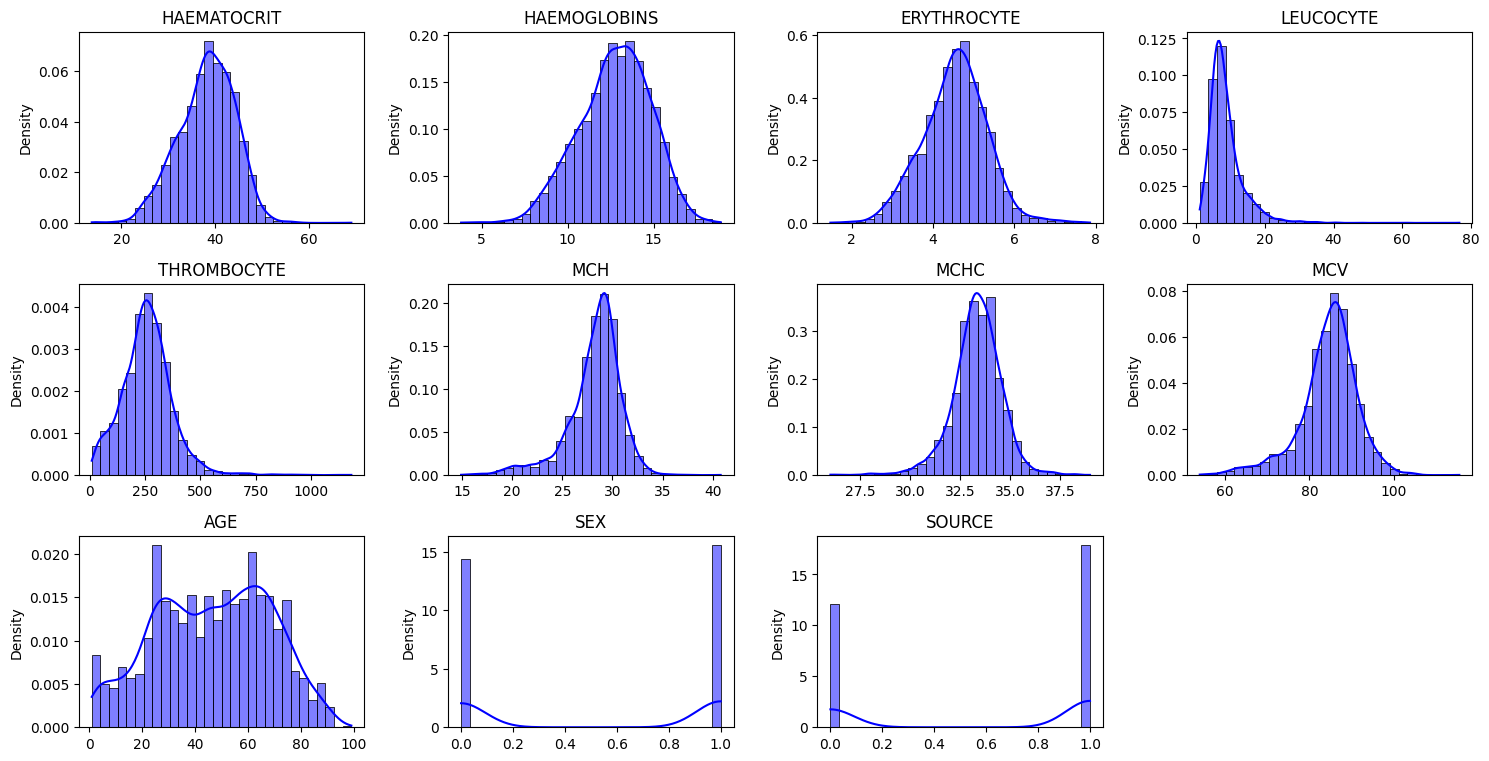

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran keseluruhan gambar
plt.figure(figsize=(15, 10))

# Mendapatkan daftar semua kolom numerik
# Include 'location_encoded' and 'type_encoded' explicitly
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
# Looping untuk menghasilkan subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Sesuaikan grid (4x4) jika jumlah kolom lebih banyak
    sns.histplot(dataset[column], kde=True, color='blue', stat="density", bins=30)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
# feature importance
dataset.corr()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
HAEMATOCRIT,1.000000,0.973267,0.864989,-0.217218,-0.003562,0.083714,0.108098,0.054948,-0.254799,0.274364,0.271190
HAEMOGLOBINS,0.973267,1.000000,0.818013,-0.208583,-0.045441,0.203248,0.314159,0.105379,-0.239480,0.308010,0.255793
ERYTHROCYTE,0.864989,0.818013,1.000000,-0.186711,0.025879,-0.383666,-0.048313,-0.436041,-0.412858,0.246158,0.232001
LEUCOCYTE,-0.217218,-0.208583,-0.186711,1.000000,0.283262,-0.014840,0.003194,-0.015885,0.191987,0.050660,-0.137359
THROMBOCYTE,-0.003562,-0.045441,0.025879,0.283262,1.000000,-0.138058,-0.198921,-0.075961,0.031064,-0.081131,0.243202
MCH,0.083714,0.203248,-0.383666,-0.014840,-0.138058,1.000000,0.589830,0.931804,0.350166,0.077855,0.013308
MCHC,0.108098,0.314159,-0.048313,0.003194,-0.198921,0.589830,1.000000,0.259672,0.041741,0.203915,-0.017711
MCV,0.054948,0.105379,-0.436041,-0.015885,-0.075961,0.931804,0.259672,1.000000,0.395380,0.000262,0.022524
AGE,-0.254799,-0.239480,-0.412858,0.191987,0.031064,0.350166,0.041741,0.395380,1.000000,0.026647,-0.109533
SEX,0.274364,0.308010,0.246158,0.050660,-0.081131,0.077855,0.203915,0.000262,0.026647,1.000000,-0.051795


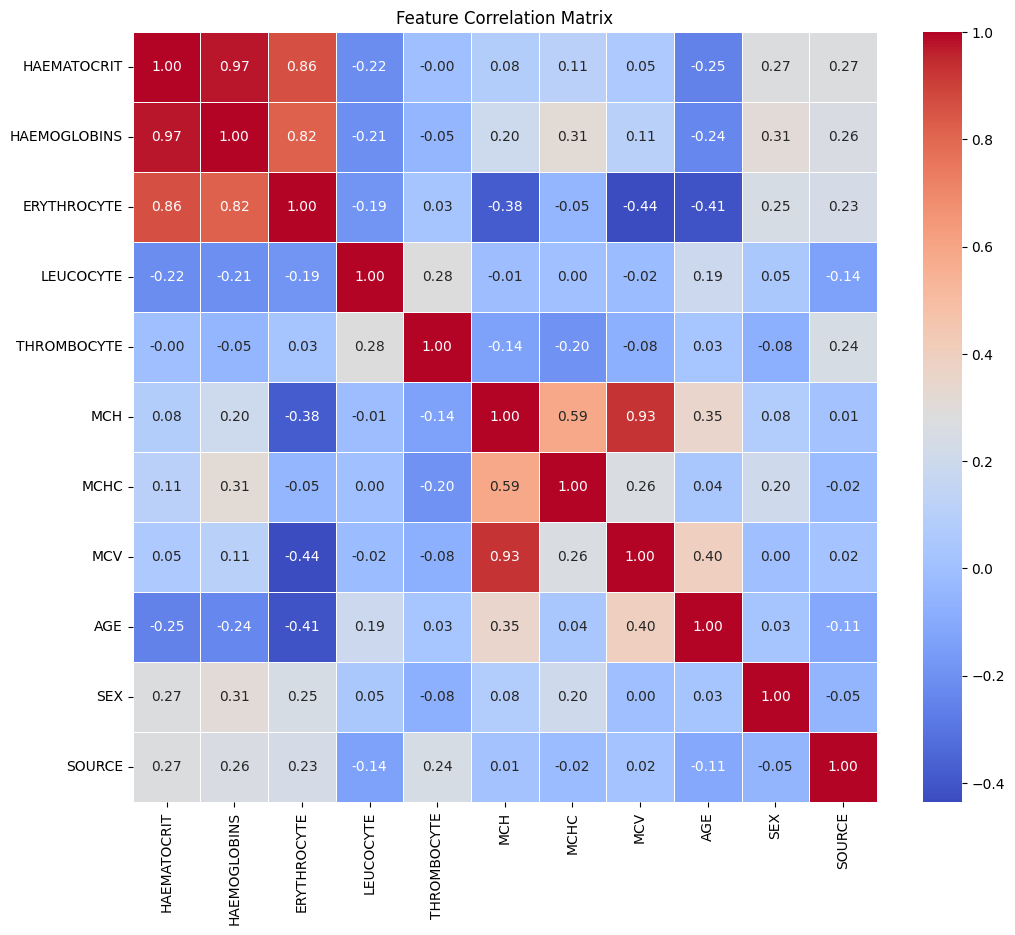

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate the correlation matrix
# correlation_matrix = dataset.corr()

# # Get a list of all columns in the DataFrame
# all_columns = correlation_matrix.columns

# # Iterate through each column
# for column in all_columns:
#     # Get correlations for the current column (excluding itself)
#     target_correlations = correlation_matrix[column].drop(column)

#     # Sort correlations in descending order
#     sorted_correlations = target_correlations.sort_values(ascending=False)

#     # Create a bar plot for the current column
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
#     plt.title(f'Feature Correlation with {column}')
#     plt.xlabel('Correlation Coefficient')
#     plt.ylabel('Feature')
#     plt.show()

In [ ]:
# Now you can access the columns using the new names
col1 = dataset['SOURCE']
col2 = [dataset['HAEMATOCRIT'], dataset['HAEMOGLOBINS'], dataset['ERYTHROCYTE'], dataset['LEUCOCYTE'], dataset['THROMBOCYTE'], dataset['MCH'], dataset['MCHC'], dataset['MCV'], dataset['AGE'], dataset['SEX']]
col_name = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH','MCHC','MCV','AGE','SEX']
corr_col = [col1.corr(col2[i]) for i in range(0, len(col2))]

corr_dataset = pd.DataFrame({'Column_Name': col_name, 'Correlation with SOURCE': corr_col})

corr_dataset.sort_values(by='Correlation with SOURCE', ascending=False)

,Column_Name,Correlation with SOURCE
0,HAEMATOCRIT,0.271190
1,HAEMOGLOBINS,0.255793
4,THROMBOCYTE,0.243202
2,ERYTHROCYTE,0.232001
7,MCV,0.022524
5,MCH,0.013308
6,MCHC,-0.017711
9,SEX,-0.051795
8,AGE,-0.109533
3,LEUCOCYTE,-0.137359


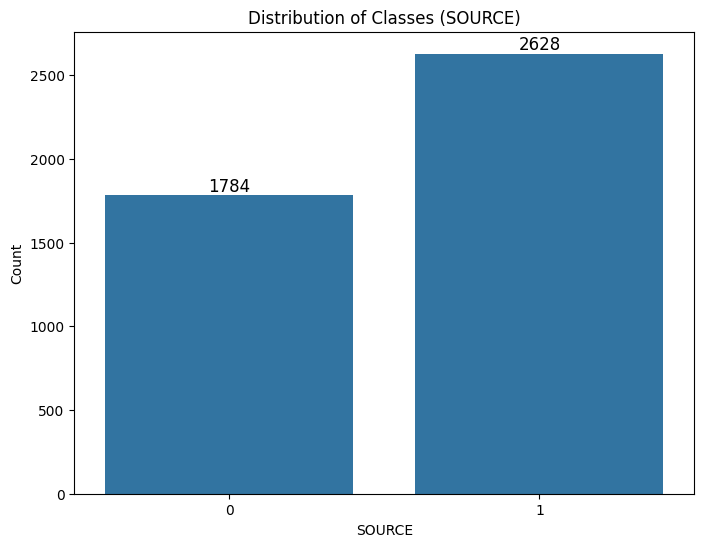

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='SOURCE', data=dataset)
plt.title('Distribution of Classes (SOURCE)')
plt.xlabel('SOURCE')
plt.ylabel('Count')

# Display the counts on top of the bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                   fontsize=12, color='black', ha='center', va='bottom')

plt.show()

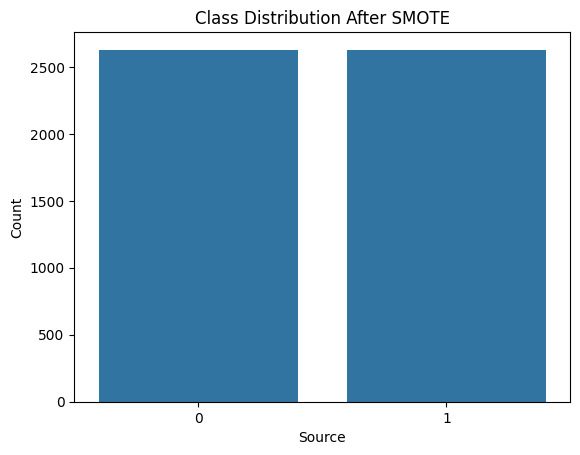

In [ ]:
!pip install imblearn # Install imblearn if you haven't already

import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your original DataFrame and 'SOURCE' is the target column
X = dataset.drop('SOURCE', axis=1)  # Features (all columns except 'SOURCE')
y = dataset['SOURCE']  # Target variable ('SOURCE' column)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_dataset = pd.DataFrame(X_resampled, columns=X.columns)
resampled_dataset['SOURCE'] = y_resampled

# Visualize the balanced data
sns.countplot(x='SOURCE', data=resampled_dataset)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

##RANDOM FOREST






In [ ]:
# import numpy as np

# # Membagi dataset secara manual menjadi data training dan testing
# def train_test_split_manual(X, y, test_size=0.2, random_state=None):
#     if random_state:
#         np.random.seed(random_state)
#     indices = np.arange(X.shape[0])  # Indeks dari dataset
#     np.random.shuffle(indices)  # Acak indeks

#     test_size = int(len(X) * test_size)  # Hitung ukuran data testing
#     test_indices = indices[:test_size]  # Indeks untuk testing
#     train_indices = indices[test_size:]  # Indeks untuk training

#     # Pisahkan data training dan testing
#     X_train, X_test = X[train_indices], X[test_indices]
#     y_train, y_test = y[train_indices], y[test_indices]

#     # Cetak hasil pembagian
#     print("X_train:", X_train)
#     print("X_test:", X_test)
#     print("y_train:", y_train)
#     print("y_test:", y_test)

#     return X_train, X_test, y_train, y_test

# # Contoh penggunaan dengan dataset Anda
# # Fitur yang akan digunakan
# Features = ['number_bedroom', 'number_bathroom', 'area(m2)', 'location_encoded', 'type_encoded', 'unit_price (RM)/m2']
# x = dataset[Features].values  # Konversi ke NumPy array
# y = dataset['list_price (RM)'].values  # Target

# # Pastikan bentuk data sesuai
# print("Shape X:", x.shape)
# print("Shape y:", y.shape)

# # Membagi dataset
# X_train, X_test, y_train, y_test = train_test_split_manual(x, y, test_size=0.2, random_state=42)

# # Verifikasi bentuk data hasil split
# print("Shape X_train:", X_train.shape)
# print("Shape X_test:", X_test.shape)
# print("Shape y_train:", y_train.shape)
# print("Shape y_test:", y_test.shape)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier # Changed to RandomForestClassifier
# from sklearn.model_selection import train_test_split

# # Assuming 'X' contains your features and 'y' contains the target variable (house price)
# X = dataset.drop(columns=['SOURCE'])
# # The target variable 'y' should be the 'list_price' column from your DataFrame, not a string
# y = dataset['SOURCE']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Changed to RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters
# rf_model.fit(X_train, y_train)

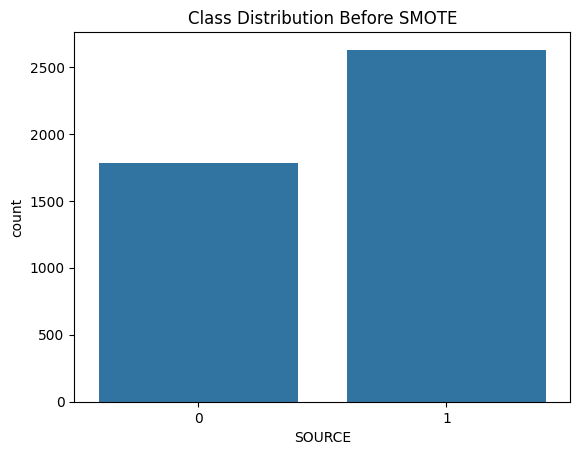

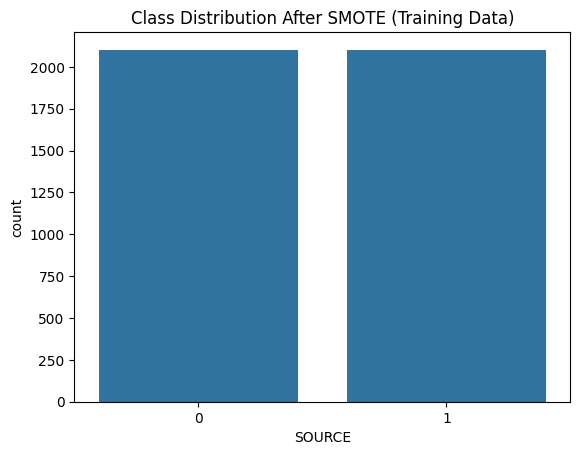

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 73.16%
Confusion Matrix:
 [[236 121]
 [116 410]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.67       357
           1       0.77      0.78      0.78       526

    accuracy                           0.73       883
   macro avg       0.72      0.72      0.72       883
weighted avg       0.73      0.73      0.73       883


Feature Importances:
[0.1180257  0.08093708 0.09959506 0.11919779 0.24298345 0.07229964
 0.07417067 0.08440632 0.09682561 0.01155867]


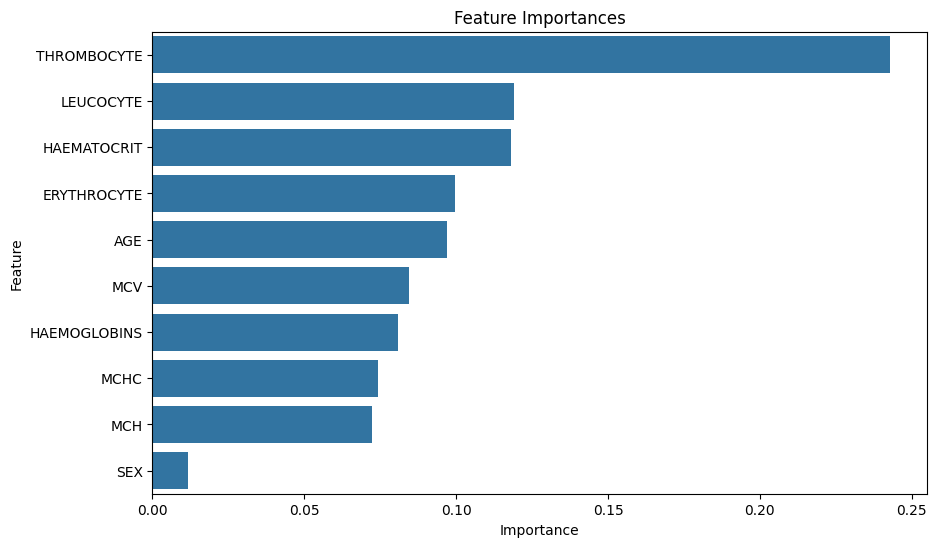

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load and Prepare Data (Replace with your actual data loading)
# Assuming 'dataset' is your DataFrame
X = dataset.drop('SOURCE', axis=1)
y = dataset['SOURCE']

# 2. Visualize Class Imbalance (Before SMOTE)
sns.countplot(x='SOURCE', data=dataset)
plt.title('Class Distribution Before SMOTE')
plt.show()

# 3. Split Data BEFORE Oversampling and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Apply SMOTE to Training Data ONLY
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Visualize Balanced Training Data (After SMOTE)
resampled_dataset = pd.DataFrame(X_train_resampled, columns=X.columns)
resampled_dataset['SOURCE'] = y_train_resampled
sns.countplot(x='SOURCE', data=resampled_dataset)
plt.title('Class Distribution After SMOTE (Training Data)')
plt.show()

# 6. Scale Numerical Features (AFTER splitting and SMOTE)
numerical_cols = X_train_resampled.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  # Use the same scaler

# 7. Hyperparameter Tuning with GridSearchCV (Expanded Grid)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  # Added False back in
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)  # cv=5
grid_search.fit(X_train_resampled, y_train_resampled)

# 8. Evaluate Best Model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}") # Print best parameters
print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# 9. (Optional) Feature Importance
feature_importances = best_rf.feature_importances_
print("\nFeature Importances:")
print(feature_importances)

# You can also visualize feature importances:
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'resampled_dataset' is your DataFrame after applying SMOTE
X = resampled_dataset.drop(columns=['SOURCE'])  # Features
y = resampled_dataset['SOURCE']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       532
           1       0.78      0.77      0.77       520

    accuracy                           0.78      1052
   macro avg       0.78      0.78      0.78      1052
weighted avg       0.78      0.78      0.78      1052


Confusion Matrix:
[[421 111]
 [122 398]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **Hyperparameter Tuning dengan GridSearchCV**
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# **Gunakan Model Terbaik**
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# **Evaluasi Model**
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# **Tampilkan Hasil**
print(f"Akurasi Model setelah optimasi: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Prediksi nilai kontinu
predictions = rf.predict(X_test)

# Simpan prediksi dalam DataFrame
df_predictions = pd.DataFrame({'Prediction': predictions})

# Menentukan threshold berdasarkan median
threshold = np.median(predictions)

# Klasifikasi ulang berdasarkan threshold
df_predictions['Class'] = np.where(df_predictions['Prediction'] >= threshold, "Rawat Inap", "Tidak Rawat Inap")

# Ubah kembali label ke numerik agar bisa dibandingkan dengan y_test
df_predictions['Class'] = df_predictions['Class'].map({"Rawat Inap": 1, "Tidak Rawat Inap": 0})

# Evaluasi hasil klasifikasi ulang
accuracy = accuracy_score(y_test, df_predictions['Class'])
conf_matrix = confusion_matrix(y_test, df_predictions['Class'])

# Tampilkan hasil
print(f'Akurasi setelah klasifikasi ulang: {accuracy:.2%}')
print("Confusion Matrix:")
print(conf_matrix)

# Tampilkan distribusi hasil klasifikasi ulang
df_classification = df_predictions['Class'].value_counts().rename_axis('Class').reset_index(name='Counts')
print(df_classification)


In [ ]:
class DecisionTree:
    def __init__(self, max_depth=7):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y) # Changed _build_tree to build_tree

    def build_tree(self, X, y, depth=0): # Changed _build_tree to build_tree
        num_samples, num_features = X.shape
        if num_samples == 0 or (self.max_depth and depth >= self.max_depth):
            return np.mean(y)

        # Corrected method name to 'best_split'
        best_feature, best_threshold = self.best_split(X, y)
        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_tree = self.build_tree(X[left_indices], y[left_indices], depth + 1) # Changed _build_tree to build_tree
        right_tree = self.build_tree(X[right_indices], y[right_indices], depth + 1) # Changed _build_tree to build_tree

        return (best_feature, best_threshold, left_tree, right_tree)

    def best_split(self, X, y):
        best_mse = float('inf')
        best_feature, best_threshold = None, None
        num_features = X.shape[1]

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                # Corrected method name to 'calculate_mse'
                mse = self.calculate_mse(y[left_indices], y[right_indices])
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_mse(self, left_y, right_y):
        total_samples = len(left_y) + len(right_y)
        if total_samples == 0:
            return 0
        left_mse = np.mean((left_y - np.mean(left_y)) ** 2) * len(left_y) / total_samples
        right_mse = np.mean((right_y - np.mean(right_y)) ** 2) * len(right_y) / total_samples
        return left_mse + right_mse

    def predict(self, X):
        return np.array([self.predict_sample(sample, self.tree) for sample in X])  # Changed '_predict_sample' to 'predict_sample'


    def predict_sample(self, sample, tree):
        if isinstance(tree, tuple):
            feature, threshold, left_tree, right_tree = tree
            if sample[feature] <= threshold:
                # Changed '_predict_sample' to 'predict_sample' for recursive calls
                return self.predict_sample(sample, left_tree)
            else:
                # Changed '_predict_sample' to 'predict_sample' for recursive calls
                return self.predict_sample(sample, right_tree)
        else:
            return tree

In [ ]:
class RandomForestRegressor:
    def __init__(self, n_trees=10, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            # Use iloc to select rows by index for bootstrap sampling
            bootstrap_indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            X_bootstrap = X.iloc[bootstrap_indices]  # Use iloc for row selection
            y_bootstrap = y.iloc[bootstrap_indices]  # Use iloc for row selection
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_bootstrap.values, y_bootstrap.values) # Pass NumPy arrays to DecisionTree
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X.values) for tree in self.trees]) # Pass NumPy array to predict
        return np.mean(tree_predictions, axis=0)

In [ ]:
# Inisialisasi model
rf = RandomForestRegressor(n_trees=10, max_depth=5)

# Latih model
rf.fit(X_train, y_train)

# Prediksi pada data testing
predictions = rf.predict(X_test)

# Tampilkan prediksi
# print("Predictions:", predictions)
# Create a DataFrame with predictions and counts
df_predictions = pd.DataFrame({'Prediction': predictions})
df_counts = df_predictions['Prediction'].value_counts().rename_axis('Prediction').reset_index(name='Counts')

# Sort the DataFrame by 'Prediction' in descending order
df_counts = df_counts.sort_values(by=['Prediction'], ascending=False)
df_counts

In [ ]:
# Evaluasi pada data testing
mse_test = np.mean((predictions - y_test) ** 2)
rmse_test = np.sqrt(mse_test)
mae_test = np.mean(np.abs(predictions - y_test))
r2_test = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
accuracy_test = (1 - (mae_test / np.mean(y_test))) * 100

# Prediksi pada data training
predictions_train = rf.predict(X_train)
mse_train = np.mean((predictions_train - y_train) ** 2)
rmse_train = np.sqrt(mse_train)
mae_train = np.mean(np.abs(predictions_train - y_train))
r2_train = 1 - (np.sum((y_train - predictions_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
accuracy_train = (1 - (mae_train / np.mean(y_train))) * 100

print("Evaluation on Training Data:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"R-squared (R²): {r2_train}")
print(f"Accuracy (%): {accuracy_train:.2f}%\n")

print("Evaluation on Testing Data:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R-squared (R²): {r2_test}")
print(f"Accuracy (%): {accuracy_test:.2f}%")

Hyperparameter Tuning

In [ ]:
# Tuning hyperparameters secara manual
n_trees_options = [5, 10, 20]
max_depth_options = [3, 5, 7]

best_mse = float('inf')
best_n_trees = None
best_max_depth = None

for n_trees in n_trees_options:
    for max_depth in max_depth_options:
        rf = RandomForestRegressor(n_trees=n_trees, max_depth=max_depth)
        rf.fit(X_train, y_train)
        predictions = rf.predict(X_test)

        mse = np.mean((predictions - y_test) ** 2)
        print(f'n_trees: {n_trees}, max_depth: {max_depth}, MSE: {mse}')

        if mse < best_mse:
            best_mse = mse
            best_n_trees = n_trees
            best_max_depth = max_depth

print(f'Best n_trees: {best_n_trees}, Best max_depth: {best_max_depth}, Best MSE: {best_mse}')


BEST MODEL

In [ ]:
def train_best_model(X_train, y_train, X_test, y_test):
    best_mse = float('inf')
    best_model = None
    best_params = {}

    for n_trees in [5, 10, 20]:
        for max_depth in [3, 5, 10]:
            for bootstrap in [True, False]:
                rf = RandomForestRegressor(n_trees=n_trees, max_depth=max_depth)

                if bootstrap:
                    # Use iloc to select rows by index for bootstrap sampling
                    indices = np.random.choice(np.arange(len(X_train)), size=len(X_train), replace=True)
                    X_train_bootstrap = X_train.iloc[indices]  # Use iloc for row selection
                    y_train_bootstrap = y_train.iloc[indices]  # Use iloc for row selection
                else:
                    X_train_bootstrap, y_train_bootstrap = X_train, y_train

                rf.fit(X_train_bootstrap, y_train_bootstrap)
                predictions = rf.predict(X_test)

                mse = np.mean((predictions - y_test) ** 2)

                if mse < best_mse:
                    best_mse = mse
                    best_model = rf
                    best_params = {
                        'n_trees': n_trees,
                        'max_depth': max_depth,
                        'bootstrap': bootstrap
                    }

    return best_model, best_params, best_mse

def calculate_accuracy(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    accuracy = (1 - (mae / np.mean(y_true))) * 100
    return accuracy

# Example usage (replace X_train, y_train, X_test, y_test with actual data)
best_model, best_params, best_mse = train_best_model(X_train, y_train, X_test, y_test)
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

# Predictions using the best model
predictions = best_model.predict(X_test)
print("Predictions:", predictions)

# Calculate and print accuracy
accuracy = calculate_accuracy(y_test, predictions)
print("Accuracy (%):", accuracy)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_best_model(X_train, y_train, X_test, y_test):
    # Standardize features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_mse = float('inf')
    best_model = None
    best_params = {}

    for n_trees in [5, 10, 20]:  # Iterate over the number of trees
        for max_depth in [3, 5, 7]:  # Iterate over max depth
            for bootstrap in [True, False]:  # Iterate over bootstrap options
                # Create a Random Forest model (simple implementation)
                rf = RandomForestRegressor(n_trees=n_trees, max_depth=max_depth)

                # Bootstrap sampling if required
                if bootstrap:
                    indices = np.random.choice(np.arange(len(X_train_scaled)), size=len(X_train_scaled), replace=True)
                    X_train_bootstrap = X_train_scaled[indices]
                    y_train_bootstrap = y_train[indices]
                else:
                    X_train_bootstrap, y_train_bootstrap = X_train_scaled, y_train

                # Train the model
                rf.fit(X_train_bootstrap, y_train_bootstrap)

                # Predict on the scaled test data
                predictions = rf.predict(X_test_scaled)

                # Calculate Mean Squared Error
                mse = np.mean((predictions - y_test) ** 2)

                # Save the best model
                if mse < best_mse:
                    best_mse = mse
                    best_model = rf
                    best_params = {
                        'n_trees': n_trees,
                        'max_depth': max_depth,
                        'bootstrap': bootstrap
                    }

    return best_model, best_params, best_mse, scaler

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    accuracy = (1 - (mae / np.mean(y_true))) * 100
    return accuracy

# Train the model and get the best parameters, scaler, and MSE
best_model, best_params, best_mse, scaler = train_best_model(X_train, y_train, X_test, y_test)
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

# User input
number_bedroom = int(input('Masukkan jumlah bedroom: '))
number_bathroom = int(input('Masukkan jumlah bathroom: '))
location_encoded = int(input('Masukkan lokasi (encoded): '))
area_m2 = int(input('Masukkan area (m2): '))
type_encoded = int(input('Masukkan tipe bangunan (encoded): '))
unit_price_rm_m2 = int(input('Masukkan unit price (RM/m2): '))

# Prepare user input as a numpy array
user_input = np.array([[number_bedroom, number_bathroom, location_encoded, area_m2, type_encoded, unit_price_rm_m2]])

# Scale the user input using the fitted scaler
user_input_scaled = scaler.transform(user_input)

# Predict the price using the trained random forest model
estimasi = best_model.predict(user_input_scaled)[0]

# Ensure the estimation is non-negative
estimasi = abs(estimasi) if estimasi < 0 else estimasi

# Display the result
print("Estimasi harga:", f'{round(estimasi):,.2f}')
